In [3]:
import numpy as np
import pandas as pd

#For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# **GOAL**

The dataset we are going to be working with is the spotify songs dataset which has songs from 1960s to 2019.
We aim to do the following with the dataset : 

* Give song recommendations to the user based on a song of their choice using various song features in the dataset
* Give a genre prediction to the user based on their input based on trend analysis

The application hosted makes the process more natural. There are more features that are implemented in the application than in this file since those features require user interaction.

**TASKS covered in the application** :
* Song recommendation (Using the nearest neighbours model)
* Genre based recommendation
* Trend Analysis to determine the changing popularity of songs over the years
* Genre prediction (Using Random Forest)

What **PURPOSE** does this serve:

* Song recommendation based on a fav song or genre is a feature that is generally sought after.
* Trend analysis is key for budding artists who are trying to make it mainstream. The analysis of changing trend is a good predictor of popularity and knowing how to tune various musical elements can help with artist popularity 

#### **DATA LOADING** 
***

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv")

In [5]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [6]:
df.shape

(32833, 23)

In [7]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [9]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


#### **DATA CLEANING**
***

The features that are dropped below do not serve any purpose to us. They are either representing a pre-existing column in the dataset or unusable data

In [10]:
df.drop(columns=["track_id","track_album_id","playlist_id","playlist_name"],axis=1,inplace=True)

Only very few records with null values. Dropping the null values

In [11]:
df.isnull().sum()

track_name                  5
track_artist                5
track_popularity            0
track_album_name            5
track_album_release_date    0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [12]:
df.dropna(how="any",inplace=True)

In [13]:
df.shape

(32828, 19)

Some records had unparsable characters in the artist names or song names. Those are deleted.

In [14]:
import regex as re

def has_special_chars_in_row(row):
    for col in row.index:
        if isinstance(row[col], str) and bool(re.search(r'[^\x00-\x7F]', row[col])):
            return True
    return False
df = df[~df.apply(has_special_chars_in_row, axis=1)]

df['track_name'] = df['track_name'].str.encode('utf-8').str.decode('utf-8')
df['track_artist'] = df['track_artist'].str.encode('utf-8').str.decode('utf-8')

In [15]:
df.shape

(30193, 19)

Identifying and dropping duplicate songs (songs with same name & same artist are considered duplicate)

In [16]:
duplicates = df[df[["track_name","track_artist"]].duplicated()].sort_values(by="track_name")
duplicates.track_name

7075                                             #1 Stunna
23318    $ave Dat Money (feat. Fetty Wap & Rich Homie Q...
14503                                       '39 - 2011 Mix
28964                                     'Till I Collapse
15525                                     'Till I Collapse
                               ...                        
23478                                        thank u, next
19795                                        thank u, next
2578                                         thank u, next
18382                                        thank u, next
3814                                         thank u, next
Name: track_name, Length: 6143, dtype: object

In [17]:
df = df.drop_duplicates(subset=["track_name", "track_artist"],keep="first")

In [18]:
df.shape

(24050, 19)

In [19]:
print("Artists-------------------------")
print(df["track_artist"].value_counts())
print("Genre---------------------------")
print(df["playlist_genre"].value_counts())
print("Sub Genre-----------------------")
print(df["playlist_subgenre"].value_counts())

Artists-------------------------
track_artist
Queen                                 111
Martin Garrix                          72
David Guetta                           64
Logic                                  62
Hardwell                               61
                                     ... 
L'Epee                                  1
Captain Beefheart & His Magic Band      1
Jefferson Airplane                      1
Underworld                              1
Mat Zo                                  1
Name: count, Length: 9978, dtype: int64
Genre---------------------------
playlist_genre
rap      4680
pop      4540
edm      4361
r&b      3848
rock     3573
latin    3048
Name: count, dtype: int64
Sub Genre-----------------------
playlist_subgenre
southern hip hop             1473
indie poptimism              1443
neo soul                     1328
electro house                1323
progressive electro house    1301
hip hop                      1211
dance pop                    1171
urban

Changing all the date to have just the year because they have different formats

Some dates have just their year, while others have just the year and month while a few others have just the year. Since the anaysis and classification only requires the year, we are converting all the values to just the year

In [20]:
from datetime import datetime
def change_format(date):
    if len(date) == 4:  #Some date formats are just year
        return int(date)
    elif len(date) == 7:  #Some are just year and month
        return datetime.strptime(date, "%Y-%m").year
    else:   #Some are the year, month and day
        return datetime.strptime(date, "%Y-%m-%d").year

df['track_album_release_year'] = df['track_album_release_date'].apply(change_format)

#### **DATA VISUALISATION & TREND ANALYSIS**
***

* ### Identifying the relation between genre and popularity

C:\Users\itsme\AppData\Local\Temp\ipykernel_22188\4041776318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x="playlist_genre", y="track_popularity", kind="bar",palette = "rainbow",errorbar=None)


<Figure size 640x480 with 0 Axes>

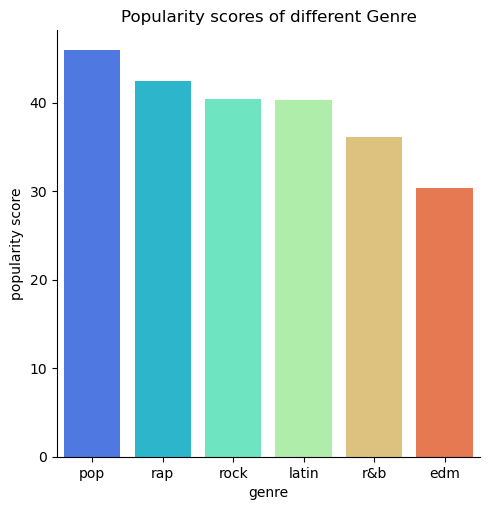

In [21]:
plt.figure()
sns.catplot(data=df, x="playlist_genre", y="track_popularity", kind="bar",palette = "rainbow",errorbar=None)
plt.xlabel("genre")
plt.ylabel("popularity score")
plt.title("Popularity scores of different Genre")
plt.show()

(In the application, this comparison is done for different years and not on the cumulative dataset)

* ### Identifying the relation between sub genre and popularity

C:\Users\itsme\AppData\Local\Temp\ipykernel_22188\2383040565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x="playlist_subgenre", y="track_popularity", kind="bar",palette = "rainbow",errorbar=None,aspect=2.5)


<Figure size 640x480 with 0 Axes>

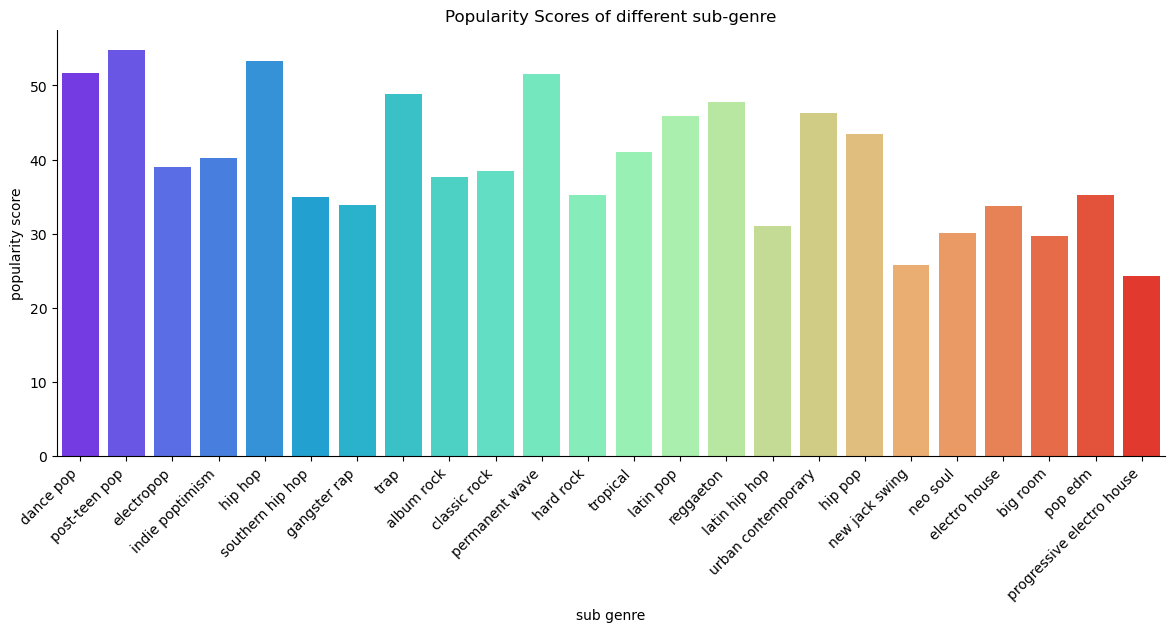

In [22]:
plt.figure()
sns.catplot(data=df, x="playlist_subgenre", y="track_popularity", kind="bar",palette = "rainbow",errorbar=None,aspect=2.5)
plt.xlabel("sub genre")
plt.ylabel("popularity score")
plt.xticks(rotation=45,ha='right')
plt.title("Popularity Scores of different sub-genre")
plt.show()

Observing the number of songs belonging to different sub-genre

In [23]:
df_temp = df.groupby("playlist_genre")["playlist_subgenre"].value_counts().reset_index()
df_temp

,playlist_genre,playlist_subgenre,count
0,edm,electro house,1323
1,edm,progressive electro house,1301
2,edm,big room,942
3,edm,pop edm,795
4,latin,latin hip hop,915
5,latin,tropical,914
6,latin,latin pop,765
7,latin,reggaeton,454
8,pop,indie poptimism,1443
9,pop,dance pop,1171


* ### Finding the most popular genre over the years

Since there isn't a direct score to analyse the popularity of the genre, we are going to use the feature "track popularity" that determines the popularity of a track. Genre popularity is calculated by taking the mean popularity of all the tracks belonging to a genre.

In [24]:
#Finding the mean popularity of each genre for each year and turning that into a pandas df using reset_index()
genre_popularity = df.groupby(['track_album_release_year', 'playlist_genre'])['track_popularity'].mean().reset_index()

#Finding the popularity with max value each year
genre_popular = genre_popularity.groupby('track_album_release_year')['track_popularity'].idxmax()

#Choosing the required columns
most_popular_genre = genre_popularity.loc[genre_popular]

In [25]:
most_popular_genre.head()

,track_album_release_year,playlist_genre,track_popularity
0,1957,r&b,59.000000
2,1958,rock,73.000000
3,1960,r&b,16.333333
4,1961,r&b,47.000000
5,1962,rock,64.000000


Using a scatter plot to observe the most popular genre of each year.

Text(0.5, 1.0, 'Popular genre over the years')

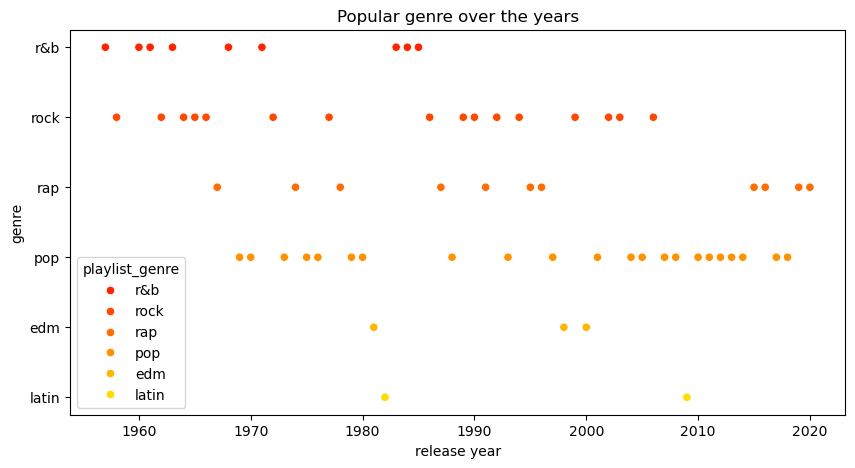

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=most_popular_genre["track_album_release_year"], y=most_popular_genre["playlist_genre"], hue=most_popular_genre["playlist_genre"],
                palette="autumn")
plt.xlabel("release year")
plt.ylabel("genre")
plt.title("Popular genre over the years")

The trend of genre over the years can be observed, with r&b being the most popular in the early 1960s to late 1980s and pop genre taking over. Rock music seemed to be quite popular till the the late 2010s.

* ### To check if the comparison based on popularity score is fair, lets check out the average popularity scores over the years

Inorder to make sure that we do not make biased assumptions based on hugely different popularity scores, it is important to observe if there is a drastic drift in the popularity score of tracks. Eg: If the popularity scores for songs back in the day is very high compared to now, it might be that the song popularity was calculated using a different metric. Having consistent scores will validate the next steps.

In [27]:
popularity = df.groupby("track_album_release_year")["track_popularity"].mean().reset_index()

In [28]:
count_release = df.groupby("track_album_release_year").size().reset_index(name="count")

Plotting the number of song releases and average popularity scores for each year

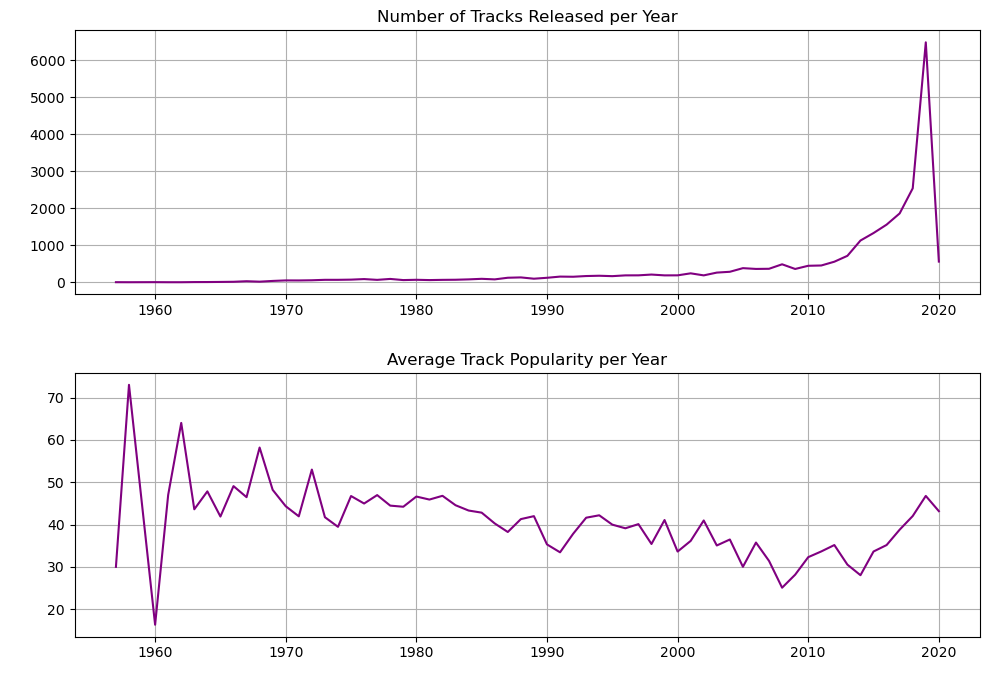

In [29]:
fig, (plot1, plot2) = plt.subplots(2, 1, figsize=(10,7))
warnings.filterwarnings("ignore")

sns.lineplot(data=popularity, x="track_album_release_year", y="track_popularity", ax=plot2, c="purple")
plot2.set_title('Average Track Popularity per Year')
plot2.set_xlabel('Release Year',color="white")
plot2.set_ylabel('Average Popularity Score',color="white")
# plot2.set_xticks(color="white")
# plot2.set_yticks(color="white")
plot2.grid(True)

sns.lineplot(data=count_release, x="track_album_release_year", y="count", ax=plot1, c="purple")
plot1.set_title('Number of Tracks Released per Year')
plot1.set_xlabel('Release Year',color="white")
plot1.set_ylabel('Number of Tracks Released per year',color="white")
# plot1.set_xticks(color="white")
# plot1.set_yticks(color="white")
plot1.grid(True)

plt.tight_layout()
plt.show()

Although the number of releases is exponentially more in later years, the data will not be biased because the average popularity score has remained almost the same over the years. Hence there wouldn't be a very evident differentiation between the tracks over the years.

### Lets check out popular artists now!

* ### 20 most famous artists and their average popularity based on tracks OF ALL TIME

In [30]:
artists = df.groupby("track_artist")["track_popularity"].mean().reset_index()
artists = artists.sort_values(by="track_popularity",ascending=False)[0:20]

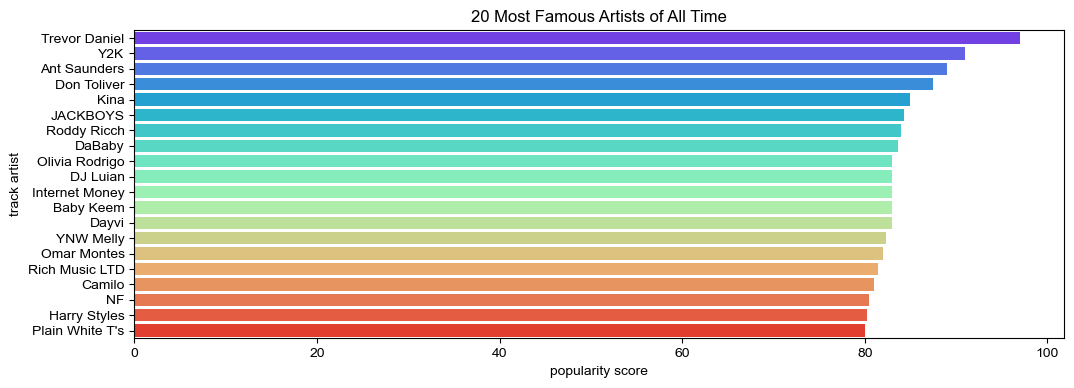

In [31]:
plt.figure(figsize=(12,4))
sns.barplot(y=artists["track_artist"], x=artists["track_popularity"], palette="rainbow", orient="h")
plt.xlabel("popularity score")
plt.ylabel("track artist")
plt.title("20 Most Famous Artists of All Time")
sns.set_style("dark")

* ### Famous artists over the years

In [32]:
artists_year = df.groupby(["track_album_release_year","track_artist"])["track_popularity"].mean().astype(int).reset_index()
artists_popular = artists_year.loc[artists_year.groupby("track_album_release_year")["track_popularity"].idxmax()]
artists_popular

,track_album_release_year,track_artist,track_popularity
1,1957,Ray Charles,59
2,1958,Elvis Presley,73
4,1960,Etta James,25
6,1961,Chavela Vargas,47
7,1962,Booker T. & the M.G.'s,64
...,...,...,...
7701,2016,Post Malone,84
8758,2017,NF,83
10609,2018,Trevor Daniel,97
14456,2019,The Weeknd,95


* ### Most popular artists in the last 10 years

In [33]:
artists = artists_popular.sort_values(by="track_album_release_year",ascending=False)[0:10]

Text(0.5, 1.0, 'Most Popular Artists over the year')

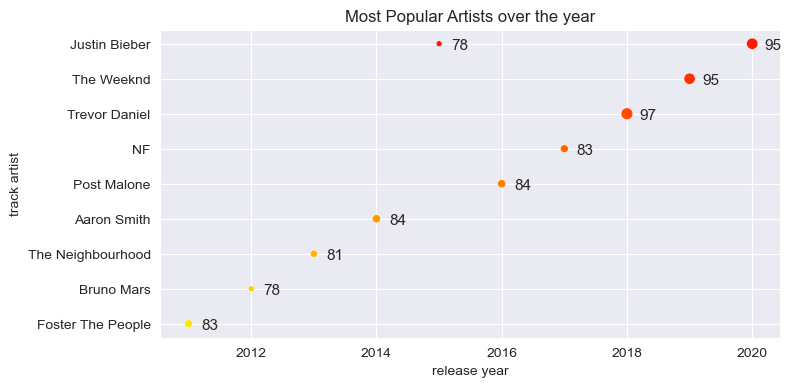

In [34]:
plt.figure(figsize=(8,4))
sns.set_style("darkgrid")
sns.scatterplot(x=artists["track_album_release_year"], y=artists["track_artist"],hue=artists["track_artist"],
                palette="autumn",
                size=artists["track_popularity"],
                legend=False,
                )

for x in range(artists.shape[0]):
    plt.annotate(f"{artists['track_popularity'].iloc[x]}",
                 (artists['track_album_release_year'].iloc[x], artists['track_artist'].iloc[x]),
                 textcoords="offset points",
                 xytext=(9,-4),
                 fontsize=11)

plt.xlabel("release year")
plt.ylabel("track artist")
plt.title("Most Popular Artists over the year")

The size of the dots represent the magnitude of popularity score

* ### Most popular artist of each genre

In [35]:
artists_genre = df.groupby(["playlist_genre","track_artist"])["track_popularity"].mean().reset_index()
artists_genre_popular = artists_genre.loc[artists_genre.groupby("playlist_genre")["track_popularity"].idxmax()]

In [36]:
artists_genre_popular

,playlist_genre,track_artist,track_popularity
64,edm,Alex & Sierra,79.0
3450,latin,Post Malone,90.0
5000,pop,KAROL G,98.0
6967,r&b,Harry Styles,88.0
8619,rap,Don Toliver,87.5
11019,rock,Peachy!,78.0


Doesn't necessarily mean that they make that genre of music predominantly, but one or more of their tracks belonging to that genre is popular

* ### Finding the correlation between genre of music and the different features defining music

First, we need to encode the categorical variables, namely the genre and the subgenre. We are using label encoding for this. 

What is label Encoding?

Label Encoding assigns numerical values to data starting from 0. It is essential to convert features to have numerical values for training the model and for purposes like determining the correlation matrix

In [37]:
#Encoding of categorical variables

from sklearn.preprocessing import LabelEncoder

LabelEncoding = LabelEncoder()

df["playlist_genre_encoded"] = LabelEncoding.fit_transform(df["playlist_genre"])
df["playlist_subgenre_encoded"] = LabelEncoding.fit_transform(df["playlist_subgenre"]) 

In [38]:
df[["playlist_genre","playlist_genre_encoded"]].value_counts()

playlist_genre  playlist_genre_encoded
rap             4                         4680
pop             2                         4540
edm             0                         4361
r&b             3                         3848
rock            5                         3573
latin           1                         3048
Name: count, dtype: int64

Plotting a heat map to observe the correlation between different features

Text(0.5, 1.0, 'Correlation Matrix')

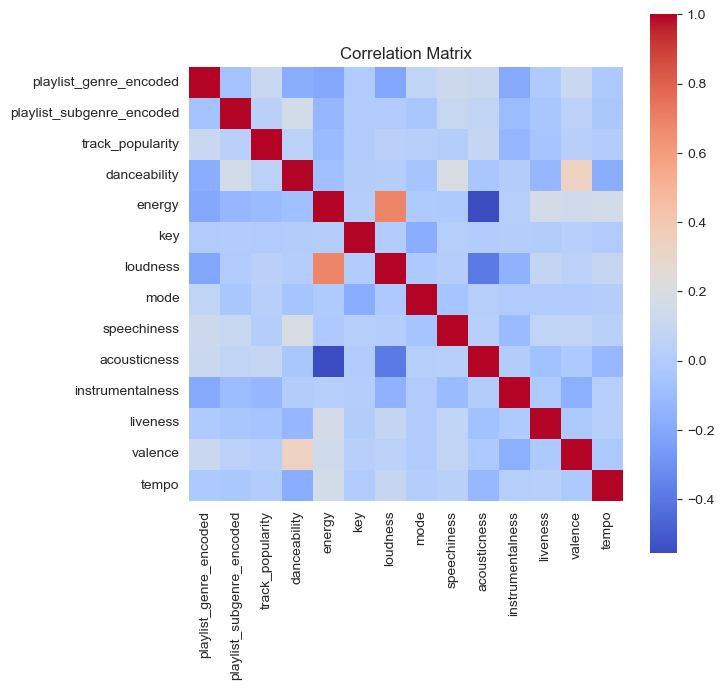

In [39]:
features = ["playlist_genre_encoded","playlist_subgenre_encoded","track_popularity", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
corr_matrix = df[features].corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Matrix")

**SCALING FEATURES**

The features are scaled using the minmax scaler which scales the required numerical features to have values between 0 and 1. Scaling is required so that model prediction will be weighted equally by all the features and not by a few features having a higher range of values.

Why use MinMax scaler?

Most of the song features have values between 0 and 1. It would therefore be easy to scale all the features to that range. Besides, it will be useful in the application for setting a range for users to select the value from.

Calculation:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In [40]:
#Scaling the numerical features with larger values to values between 0 and 1 to match others
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[["track_popularity","tempo","loudness","instrumentalness","key"]] = scaler.fit_transform(df[["track_popularity","tempo","loudness","instrumentalness","key"]])

Observing the distribution of features using a box plot because it provides clarity on the presence of outliers

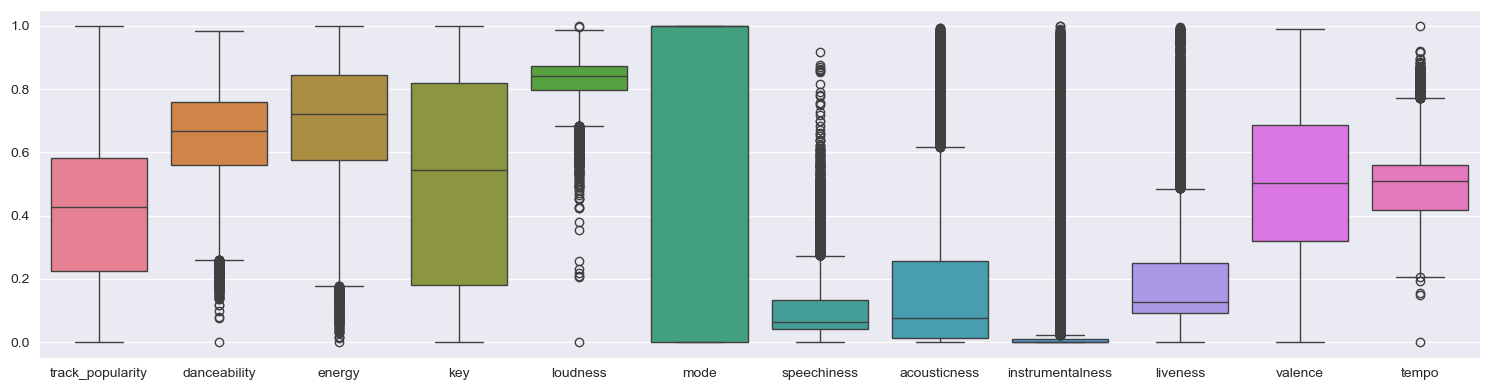

In [41]:
features = ["track_popularity", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]
plt.figure(figsize=(15,4))
sns.boxplot(data=df[features])
plt.tight_layout()

## USING THESE FEATURES LETS TRY TO CLASSIFY THE TRACKS INTO THEIR RESPECTIVE GENRE

In [42]:
#feature selection for classification

features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness","instrumentalness"]

In [43]:
#Splitting the data for training and testing

from sklearn.model_selection import train_test_split

X = df[features]
y = df["playlist_genre_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/3, random_state=42)

The model used here is the Random Forest Classifier, The model builds a number of trees using the training dataset and determines the final classification using majority voting. This classifier works well with multivariable classification problems which makes it a good choice for genre classification.
This model is chosen after trying with a number of other models.

In [44]:
#Using the random forest classifier

from sklearn.ensemble import RandomForestClassifier

forestModel = RandomForestClassifier(n_estimators=1000,random_state=10)
forestModel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=10)

In [46]:
#Calculating the accuracy score of the model.
from sklearn.metrics import accuracy_score

y_pred = forestModel.predict(X_test)
accuracy_score(y_test,y_pred)

0.4821005363602345

There are 6 genres into which the model classifies data. The accuracy of a random guess would be about 16.66%. The accuracy score is not very good but it seems to have trained based on the given features, thus providing a higher accuracy than a random guess.

In [47]:
#Determining the cross validation score for the model using cv value of 15 since the dataset is quite big
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forestModel, X_train, y_train, cv=15)

In [48]:
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Score: {scores.mean()}')

Cross-Validation Scores: [0.49766137 0.49766137 0.47240412 0.47895229 0.4686623  0.46398503
 0.4686623  0.47521048 0.49579046 0.51169317 0.46117867 0.48175865
 0.50233863 0.47565543 0.48689139]
Mean Score: 0.4825670437677879


In [49]:
print(f'Maximum Score: {scores.max()}')

Maximum Score: 0.5116931711880262


## SONG RECOMMENDATION USING NEAREST NEIGHBOURS ALGORITHM

In [50]:
features = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness"]

In [51]:
df.to_csv('songs.csv', index=False)

In [52]:
#Determining the range of features

for x in features:
    print(df[x].min(), " - ", df[x].max())

0.0  -  0.983
0.000175  -  1.0
0.0  -  1.0
0.0  -  1.0
0  -  1
0.0  -  0.918
0.0  -  0.994


In [53]:
X = df[features]

Why Nearest Neighbours algorithm?

The song recommendation system is based on feature proximity and does not have any labels to definitely classify it into. In such cases unsupervised learning algorithms such as nearest neighbours finds the closest data points based on any specified metrics like the Euclidean Distance, Manhattan Distance, Cosine Similarity etc. The model takes in one input, the features and outputs the required number of data points closest to the input.

In [54]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=11)

knn.fit(X)

NearestNeighbors(n_neighbors=11)

A sample data point

In [56]:
track = "I Don't Care (with Justin Bieber) - Loud Luxury Remix"
record = df[df["track_name"] == track]
record_features = record[features]
record_features

,danceability,energy,key,loudness,mode,speechiness,acousticness
0,0.748,0.916,0.545455,0.91809,1,0.0583,0.102


In [57]:
distance, index = knn.kneighbors(record_features)
similar_tracks = df.iloc[index[0]]

In [58]:
similar_tracks

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year,playlist_genre_encoded,playlist_subgenre_encoded
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.673469,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,pop,dance pop,0.748,0.916,0.545455,...,0.0583,0.1020,0.000000,0.0653,0.518,0.509673,194754,2019,2,3
28239,Can't Stop Playing (Makes Me High) [feat. Ane ...,DR. KUCHO!,0.581633,Can't Stop Playing (Remixes),2005,edm,electro house,0.708,0.904,0.545455,...,0.0408,0.0863,0.000180,0.1780,0.750,0.522060,157466,2005,0,4
2371,The Fox (What Does the Fox Say?),Ylvis,0.663265,The Fox (What Does The Fox Say?),2013-09-02,pop,post-teen pop,0.703,0.867,0.545455,...,0.0453,0.1070,0.000000,0.1190,0.546,0.534614,213708,2013,2,17
30816,Body Body,Appyday,0.306122,Body Body,2018-05-28,edm,pop edm,0.757,0.902,0.545455,...,0.0472,0.0274,0.016700,0.3210,0.789,0.434414,207042,2018,0,16
30492,How's This,HyunA,0.000000,A'wesome,2016-08-01,edm,pop edm,0.746,0.917,0.545455,...,0.0542,0.0225,0.000000,0.0527,0.720,0.417683,199210,2016,0,16
18079,El Calendario,Pasabordo,0.000000,Por Ti,2008-05-16,latin,latin pop,0.706,0.866,0.545455,...,0.0481,0.1200,0.000000,0.1230,0.853,0.438081,187840,2008,1,12
26995,That Beat,Matroda,0.285714,The RED Tape - Side A,2019-03-22,edm,electro house,0.758,0.947,0.545455,...,0.0468,0.0171,0.565392,0.1140,0.427,0.526282,149325,2019,0,4
649,Summertime Love,Captain Cuts,0.561224,Summertime Love,2019-08-23,pop,dance pop,0.713,0.850,0.545455,...,0.0582,0.1400,0.000010,0.1740,0.672,0.509443,143670,2019,2,3
18025,Sabes A Chocolate,Kumbia Kings,0.418367,Sabes A Chocolate,2008-01-01,latin,latin pop,0.749,0.908,0.636364,...,0.0673,0.1030,0.000332,0.1500,0.761,0.459251,226333,2008,1,12
365,Came Here for Love,Sigala,0.693878,Came Here for Love,2017-06-09,pop,dance pop,0.708,0.868,0.545455,...,0.0431,0.0313,0.000000,0.1220,0.720,0.522026,202999,2017,2,3


Calculation of similarity can be considered as a metric for calculating the accuracy of the model. Since the model is an unsupervised learning model without any definite classes or values to compare it to for predicting accuracy, calculating of mean similarity between the predicted values and the input values can serve as a good estimate for observing the model performance.

In [59]:
#Calculating the similarity between the input and the predicted features

def calc_similarity(actual, calc):
    value = (abs(actual - calc)/actual)*100
    return (100 - value)

Trying to display the similarity between each feature in the 10 similar data samples and the input sample

In [60]:
plot_data = []
similarity_score = []

for x in range(10):
    track = similar_tracks.iloc[x,:]
    track_record = {}
    for y in track.keys():
        if(y in features):
            score = calc_similarity(record_features[y].values[0], track[y])
            track_record[y] = score

            plot_data.append({
                "Track": f"Track {x}",
                "Category": y,
                "Value": record_features[y].values[0],
                "Type": "Actual"
            })
            plot_data.append({
                "Track": f"Track {x}",
                "Category": y,
                "Value": score/100,
                "Type": "Calculated"
            })
    similarity_score.append(track_record)
            

In [61]:
plot_df = pd.DataFrame(plot_data)
plot_df.head(15)

,Track,Category,Value,Type
0,Track 0,danceability,0.748000,Actual
1,Track 0,danceability,1.000000,Calculated
2,Track 0,energy,0.916000,Actual
3,Track 0,energy,1.000000,Calculated
4,Track 0,key,0.545455,Actual
5,Track 0,key,1.000000,Calculated
6,Track 0,loudness,0.918090,Actual
7,Track 0,loudness,1.000000,Calculated
8,Track 0,mode,1.000000,Actual
9,Track 0,mode,1.000000,Calculated


Using a bar plot to compare the values

In [62]:
def bar_plot(track):
    Track = f"Track {track}"
    temp_df = plot_df[plot_df["Track"] == Track]
    print(temp_df)

    plt.figure(figsize=(4,4))
    sns.barplot(x="Category", y="Value", hue="Type", palette=["crimson","teal"], data=temp_df)
    plt.xlabel("Category", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.title("SIMILARITY")
    plt.xticks(rotation=90)
    plt.tight_layout()

      Track      Category     Value        Type
84  Track 6  danceability  0.748000      Actual
85  Track 6  danceability  0.986631  Calculated
86  Track 6        energy  0.916000      Actual
87  Track 6        energy  0.966157  Calculated
88  Track 6           key  0.545455      Actual
89  Track 6           key  1.000000  Calculated
90  Track 6      loudness  0.918090      Actual
91  Track 6      loudness  0.990711  Calculated
92  Track 6          mode  1.000000      Actual
93  Track 6          mode  1.000000  Calculated
94  Track 6   speechiness  0.058300      Actual
95  Track 6   speechiness  0.802744  Calculated
96  Track 6  acousticness  0.102000      Actual
97  Track 6  acousticness  0.167647  Calculated


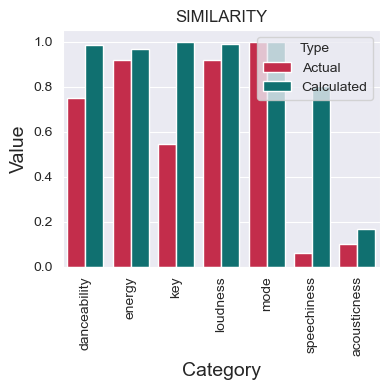

In [63]:
bar_plot(6)

Iteratively displaying all the similarity score calculated above

In [64]:
for x in similarity_score:
    sum  = 0
    for y in x:
        sum += x[y]
        print(y,"->", x[y])
    print(sum/7)
    print("\n")

danceability -> 100.0
energy -> 100.0
key -> 100.0
loudness -> 100.0
mode -> 100.0
speechiness -> 100.0
acousticness -> 100.0
100.0


danceability -> 94.65240641711229
energy -> 98.68995633187772
key -> 100.0
loudness -> 94.82813712511982
mode -> 100.0
speechiness -> 69.98284734133792
acousticness -> 84.6078431372549
91.82302719324323


danceability -> 93.98395721925134
energy -> 94.65065502183405
key -> 100.0
loudness -> 96.21582142694116
mode -> 100.0
speechiness -> 77.70154373927959
acousticness -> 95.09803921568627
93.95000237471321


danceability -> 98.79679144385027
energy -> 98.47161572052401
key -> 100.0
loudness -> 99.8219747112795
mode -> 100.0
speechiness -> 80.96054888507719
acousticness -> 26.862745098039213
86.41623940839574


danceability -> 99.73262032085562
energy -> 99.89082969432314
key -> 100.0
loudness -> 98.96836627561967
mode -> 100.0
speechiness -> 92.96740994854203
acousticness -> 22.058823529411768
87.65972139553602


danceability -> 94.3850267379679
energy ->

### **CONCLUSION**

We have successfully built two models using two very different algorithms. The Random Forest Algorithm is a supervised learning algorithm while the Nearest Neighbour algorithm is an unsupervised learning algorithm. 

In addition, we also gathered some insight on genre and popularity trends over the years.